<a href="https://colab.research.google.com/github/FrancisKurian/CS530/blob/main/Naive_Bayes_on_UCI_Breast_Cancer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naive Bayesian Classifier
## Contents
* Bayes' theorem
* Simplified example to understand the concept
* Breast Cancer data reading/cleaning steps
  * training 80%, test 20% random sample splits 
* Sub feature level probability computation
  * function prob_lookup to compute probabilities from training data
* User defined Classifier function : Classifier()
  * Scoring Training data-Compare with actual Confusion Matrix,ROC
  * Scoring Test data:Holdout sample validation. Confusion Matrix,ROC
* sklearn.naive_bayes.CategoricalNB
  * Scoring Training data-compare with actual. Confusion Matrix,ROC
  * Scoring Test data:Holdout sample validation-Confusion Matrix,ROC
<br>
<br>

##Bayes Theorem:
$ P(A|B)=\frac{P(A|B)×P(A)}{P(B)}$
<br>
<br>
The above equation represents Bayes Theorem in which it describes the probability of an event occurring P(A) based on our prior knowledge of event B.<br>

*   P(A|B) - Posterior Probability(The conditional probability of the response variable (target variable) given the training data inputs)
*   P(A) - Prior Probability(The probability of the response variable (target variable))
*   P(B) - Evidence(The probability of the training data)
*   P(B|A) - Likelihood(The conditional probability of the training data given the response variable)

## Application in Training /Test data situation
<br>
$ Y= target ; x_i=features $<br>

$P(Y| x_1,  x_2 ...  x_n) =\frac{P( x_1|Y)×P( x_2|Y)....×P( x_n|Y)×P(Y)}{P(x_1)×P(x_2)...×P(x_n)}$
<br>
<br>
Since $P(x_1)×P(x_2)...×P(x_n)$ is a constant, 
<br>
<br>
$P(Y| x_1,  x_2 ...  x_n) \space \propto  \space  P(Y)\prod_{i=1}^{n} P( x_i|Y) $
<br>
<br>
<br>
<br>
## Breast Cancer Data - A two feature example
* Dependent variable : Class with binary outcome (no-recurrence-events, recurrence-events)
* Age Group (30-39,40-49 etc)
* tumor-size (0-4, 5-9 etc.)
###An unseen sample in test data X = {Age Group: 30-39, tumor-size: 0-4}
Here we will calculate two probabilties. Probability of recurrence given the probabilty of recurrence in the training data and Probability of non recurrence given the probability of non- recurrence evidenced in the training data. Once we have these two probabilities, we could compare the two and determine the outcome of the sample in test data.

1. $P(X|recur)=P(Age:30-39|recur)×P(tsize:0-4|recur)×P(recur)$
1. $P(X|no-recur)=P(Age:30-39|no-recur)×P(tsize:0-4|no-recur)×P(no-recur)$
* Age- AgeGroup
* tsize- tumor size
<br>
<br>
We already know the probability of these components(See the Probability output data frame below):
<br>
* $P(recur) =0.64$
* $P(non-recur) =0.36$
* $P(Age: 30-39|recur) =0.21$
* $P(Age: 30-39|non-recur) =0.11$
* $P(tumorsize:0-4|recur)=0.01$
* $P(tumorsize:0-4|non-recur)=0.03 $

1. $P(X|recur) =0.64×0.21×0.01 =0.001344$
2. $P(X|non-recur) =0.36×0.11×0.03 =0.001188$
<br>
Normalizing these probabilities for easy comparison:
<br>
$P(X|recur) =\frac{0.001344}{0.001344+0.001188} =0.53 $
<br>
$P(X|non-recur) =1-0.53 =0.47$

Clearly, with 0.53 > 0.47,  Sample X is classified in Recurrence group in this simple two feature example. This logic has been extended to 9 features in the Breast cancer dataset. Probabilities at the charecteristics(sub feature) level was computed for each feature and a function was used to classify the test data.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.data to breast-cancer (1).data


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('breast-cancer.data',header=None)
df.columns = ['Class' ,'age' ,'menopause' ,'tumor_size' ,'inv_nodes' ,'node_caps' ,'deg_malig' ,'breast' ,'breast_quad' ,'irradiat'] 
# df

In [ ]:
# df.isna().sum()

## Clean the source data prior to training /test split

In [ ]:
df['node_caps'].replace('?', 'no',inplace=True)
df['breast_quad'].replace('?', 'left_low',inplace=True)
df['irradiat'].replace('no', 'N',inplace=True)
df['irradiat'].replace('yes', 'Y',inplace=True)
#two age groups had very small # of observations. so merged with nearest
df['age'].replace('20-29', '30-39',inplace=True)
df['age'].replace('70-79', '60-69',inplace=True)
df['tumor_size'].replace('0-4', '5-9',inplace=True)

In [ ]:
# pd.crosstab(df['tumor_size'], df['Class'], margins = True)

## Function to calculate probability at sub-feature level

In [ ]:
def prob_lookup(df,target):
  df_prob2 = pd.DataFrame()
  for (columnName) in df:
    if not columnName==target:
      df_ct = pd.crosstab(df[columnName], df[target], margins = True)
      class_list = list(df_ct.index.values)[:-1] +["coltotal"]
      df_ct.index= [class_list]
      rcount=len(df_ct.index)
      df_prob0=df_ct / df_ct.iloc[rcount-1]
      df_prob=df_prob0[0:rcount-1]
      df_prob=df_prob.reset_index().iloc[: , :-1]
      df_prob2=df_prob2.append(df_prob,ignore_index=True)
  return  df_prob2

## 80% Training and 20% Test Splits 

In [ ]:
df_train = df.sample(frac=0.80, replace=False)
df_test  = df.drop(df_train.index)

## Calculate the probabilties

In [ ]:
outcome= 'Class'
df_p=prob_lookup(df_train,outcome)
py=0.2972
pn=0.7028

In [ ]:
# Probability of occurance and non occurance at charecteristics level
print(df_p)

Class    level_0  no-recurrence-events  recurrence-events
0          30-39              0.105590           0.161765
1          40-49              0.335404           0.338235
2          50-59              0.335404           0.294118
3          60-69              0.223602           0.205882
4           ge40              0.478261           0.411765
5           lt40              0.031056           0.029412
6        premeno              0.490683           0.558824
7          10-14              0.136646           0.000000
8          15-19              0.118012           0.102941
9          20-24              0.173913           0.205882
10         25-29              0.155280           0.191176
11         30-34              0.173913           0.294118
12         35-39              0.062112           0.088235
13         40-44              0.086957           0.073529
14         45-49              0.012422           0.000000
15           5-9              0.068323           0.014706
16         50-

In [ ]:
header = df_train.columns[1:10].to_list()
p_header=['Prob_'+ j for j in header]

In [ ]:
#p_header

In [ ]:
def classifier(x):
        Prob_yes=1
        Prob_no=1
        prob_dict_yes={}
        prob_dict_no={}
        
        for i in range (1,len(header)):
          
                prob_val=df_p.loc[df_p['level_0']==x[i]]
                
                #probablity of Prob_col = probablity based on the argument sent in
                prob_dict_yes={p_header[i]:prob_val['recurrence-events'].values[0]}
                prob_dict_no={p_header[i]:prob_val['no-recurrence-events'].values[0]}

                for keys,values in prob_dict_yes.items():
                      if values==0: values=0 # to take care of probabiliy with its 0
                      Prob_yes = Prob_yes * values
                
                for keys,values in prob_dict_no.items():
                      if values==0: values=0 # to take care of probabiliy with its 0
                      Prob_no = Prob_no * values
        
        prob_yes_p = Prob_yes * py
        prob_yes_n = Prob_no * pn
        
        Prob_normal_yes = (prob_yes_p) /(prob_yes_p + prob_yes_n)
        # Prob_normal_no = (prob_no_p)/(prob_yes_p + prob_yes_n)
                
        if Prob_normal_yes >= 0.5:
              forecast='recurrence-events'
        else:
              forecast='no-recurrence-events'
                    
        return(Prob_normal_yes,forecast)

## Scoring Training Dataset-(Model trained on the same dataset)

## User Defined Classifier () Function

In [ ]:
df_train[['Prob_normal_yes','forecast']]=df_train.apply(classifier,axis=1,result_type='expand')

In [ ]:
#df_train

### Confusion matrix and accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(df_train.Class=='recurrence-events', df_train.forecast =='recurrence-events')

array([[138,  23],
       [ 35,  33]])

In [ ]:
matrix=classification_report(df_train.Class=='recurrence-events', df_train.forecast =='recurrence-events')
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

       False       0.80      0.86      0.83       161
        True       0.59      0.49      0.53        68

    accuracy                           0.75       229
   macro avg       0.69      0.67      0.68       229
weighted avg       0.74      0.75      0.74       229



### ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
fpr_tr_u, tpr_tr_u, threshs_tr_u = roc_curve(df_train.Class=='recurrence-events', df_train.Prob_normal_yes)
roc_auc_tr_u = auc(fpr_tr_u, tpr_tr_u)

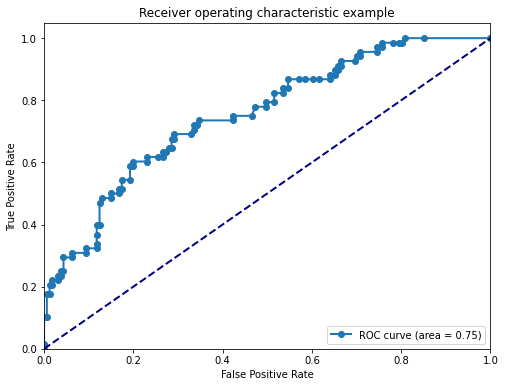

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(
    fpr_tr_u,
    tpr_tr_u,
    'o-',
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc_tr_u,   
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Sklearn Categorical Naive Bayes Classifier (CategoricalNB)

In [ ]:
#convert the features 
df_train2= df_train.apply(lambda x: pd.factorize(x)[0])
X_train = df_train2[['age' ,'menopause' ,'tumor_size' ,'inv_nodes' ,'node_caps' ,'deg_malig' ,'breast' ,'breast_quad' ,'irradiat'] ]
y_train = df_train2.Class

In [ ]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train,y_train)

CategoricalNB()

### Confusion matrix and accuracy

In [ ]:
# Check accuracy prediction vs actual
(clf.predict(X_train) == df_train2.Class).mean()

0.74235807860262

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_train2.Class, clf.predict(X_train))

array([[139,  22],
       [ 37,  31]])

In [ ]:
matrix=classification_report(df_train2.Class, clf.predict(X_train))
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       161
           1       0.58      0.46      0.51        68

    accuracy                           0.74       229
   macro avg       0.69      0.66      0.67       229
weighted avg       0.73      0.74      0.73       229



<div style="page-break-after: always;"></div>

<div style="page-break-after: always;"></div>

### ROC

In [ ]:
probs = clf.predict_proba(X_train)[:,1]
fpr_nb_tr_sk, tpr_nb_tr_sk, threshs_nb_tr_sk = roc_curve(df_train2.Class, probs)
roc_auc_nb_tr_sk = auc(fpr_nb_tr_sk, tpr_nb_tr_sk)

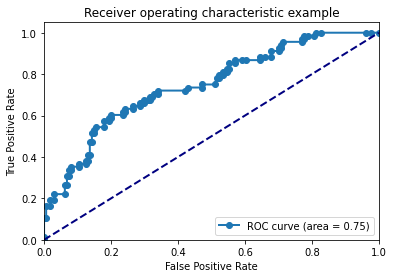

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(
    fpr_nb_tr_sk,
    tpr_nb_tr_sk,
    'o-',
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc_nb_tr_sk,   
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

<div style="page-break-after: always;"></div>

<br>

<br>


# Scoring Test Dataset- Holdout Sample Validation

## User Defined Classifier() Function

In [ ]:
df_test[['Prob_normal_yes','forecast']]=df_test.apply(classifier,axis=1,result_type='expand')

### Confusion matrix and accuracy

In [ ]:
confusion_matrix(df_test.Class=='recurrence-events', df_test.forecast =='recurrence-events')

array([[34,  6],
       [ 8,  9]])

In [ ]:
matrix=classification_report(df_test.Class=='recurrence-events', df_test.forecast =='recurrence-events')
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

       False       0.81      0.85      0.83        40
        True       0.60      0.53      0.56        17

    accuracy                           0.75        57
   macro avg       0.70      0.69      0.70        57
weighted avg       0.75      0.75      0.75        57



### ROC

In [ ]:
fpr_te_u, tpr_te_u, threshs_te_u = roc_curve(df_test.Class=='recurrence-events', df_test.Prob_normal_yes)
roc_auc_te_u = auc(fpr_te_u, tpr_te_u)

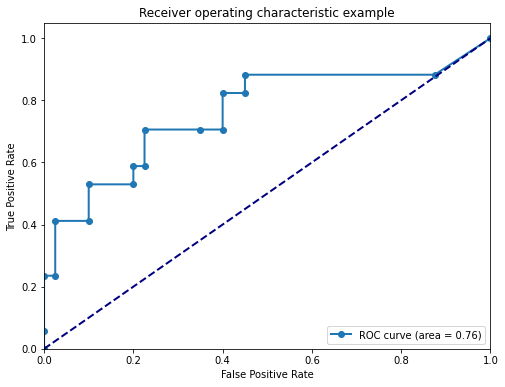

In [ ]:
plt.plot(
    fpr_te_u,
    tpr_te_u,
    'o-',
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc_te_u,   
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Sklearn Categorical Naive Bayes Classifier (CategoricalNB)

In [ ]:
#Factorize the categorical features 
df_test2= df_test.apply(lambda x: pd.factorize(x)[0])
X_test = df_test2[['age' ,'menopause' ,'tumor_size' ,'inv_nodes' ,'node_caps' ,'deg_malig' ,'breast' ,'breast_quad' ,'irradiat'] ]
y_test = df_test2.Class

### Confusion matrix and accuracy

In [ ]:
#used the model built using training data to predict test data
(clf.predict(X_test) == df_test2.Class).mean()

0.7017543859649122

In [ ]:
confusion_matrix(df_test2.Class, clf.predict(X_test))

array([[36,  4],
       [13,  4]])

In [ ]:
matrix=classification_report(df_test2.Class, clf.predict(X_test))
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.90      0.81        40
           1       0.50      0.24      0.32        17

    accuracy                           0.70        57
   macro avg       0.62      0.57      0.56        57
weighted avg       0.66      0.70      0.66        57



### ROC

In [ ]:
probs = clf.predict_proba(X_test)[:,1]
fpr_nb_te_sk, tpr_nb_te_sk, threshs_nb_te_sk = roc_curve(df_test2.Class, probs)
roc_auc_nb_te_sk = auc(fpr_nb_te_sk, tpr_nb_te_sk)

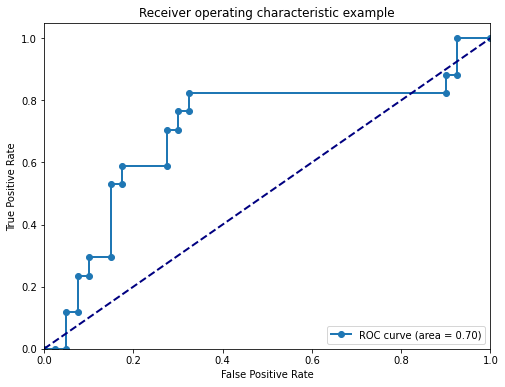

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(
    fpr_nb_te_sk,
    tpr_nb_te_sk,
    'o-',
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc_nb_te_sk,   
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

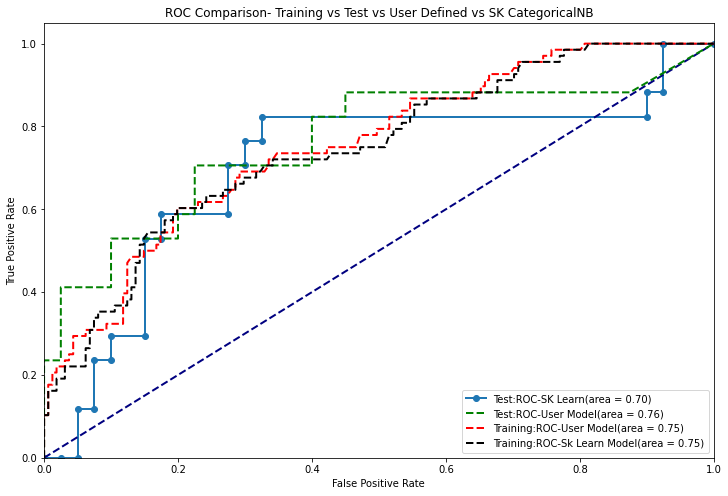

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(
    fpr_nb_te_sk,
    tpr_nb_te_sk,
    'o-',
    lw=2,
    label="Test:ROC-SK Learn(area = %0.2f)" % roc_auc_nb_te_sk,   
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.plot(fpr_te_u, tpr_te_u, color="green", lw=2, linestyle="--",label="Test:ROC-User Model(area = %0.2f)" % roc_auc_te_u)
plt.plot(fpr_tr_u, tpr_tr_u, color="red", lw=2, linestyle="--",label="Training:ROC-User Model(area = %0.2f)" % roc_auc_tr_u)
plt.plot(fpr_nb_tr_sk, tpr_nb_tr_sk, color="black", lw=2, linestyle="--",label="Training:ROC-Sk Learn Model(area = %0.2f)" % roc_auc_nb_tr_sk)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Comparison- Training vs Test vs User Defined vs SK CategoricalNB")
plt.legend(loc="lower right")
plt.show()


## Conclusion
* Overall model accuracy is pretty low with 75% on user defined model and 70% on SK learn-Categorical NB algorithm. 20% sample size was small so user model and SK learn model shows some variations. 
* Naive Bayes User defined model appears to slightly outperform the SK learn-Categorical NB algorithm in terms of accuracy and AUC. 